### 주요 변동 사항

* feature 생성한 파일에서 class 컬럼을 300을 넘는 것을 1 300보다 작은 것은 0 처리를 했습니다.
* 나머지 컬럼은 0보다 크면 1 나머지는 0으로 처리한 데이터 셋을 만들었습니다.
* Earlystopping을 튜닝시도를 해보았지만 성능이 더 저하되었고 Dense와 dropout에서도 실질적 성능향상을 찾기 힘들었습니다.
* N을 20으로 늘렸을때 roc_auc_score가 평균적으로 상승했음 더 많은 것을 반영하기 위해 077 이상인 4개 예측을 반영하여 앙상블함

In [7]:
%run import_modules.py  
%matplotlib inline

# For DNN modeling
import tensorflow as tf

# Tensorflow warning off
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
tf.logging.set_verbosity(tf.logging.ERROR)

from tensorflow import set_random_seed
import keras
from keras import backend as K
from keras.layers import * #Input, Dense
from keras.models import * #Model
from keras.optimizers import *
from keras.initializers import *
from keras.regularizers import *
from keras.utils.np_utils import *
from keras.utils.vis_utils import * #model_to_dot
from keras.callbacks import EarlyStopping

In [32]:
y_train=pd.read_csv('y_train.csv')
y_train=y_train.gender
train = pd.read_csv('X_train_after_corr.csv',encoding='cp949')
test = pd.read_csv('X_test_after_corr.csv', encoding='cp949')

In [33]:
train['class']=np.where(train['class']>300,1,0)
test['class']=np.where(test['class']>300,1,0)
train=np.where(train.iloc[:,1:]>0,1,0)
test=np.where(test.iloc[:,1:]>0,1,0)
#pd.concat([train,test])

In [34]:
train=np.hstack([train])
test=np.hstack([test])



  0%|                                                                                           | 0/20 [00:00<?, ?it/s]

DAE learning curve 1/20


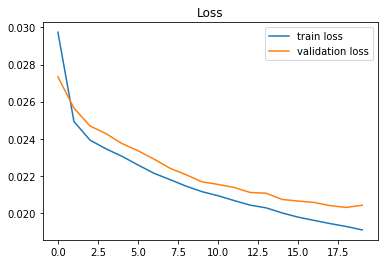

DNN learning curve 1/20


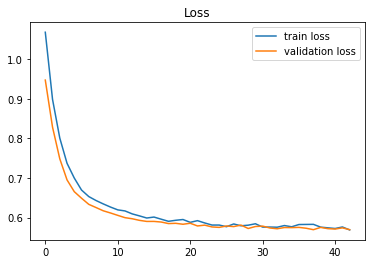

AUC 0.7649561604838742




  5%|████                                                                              | 1/20 [02:01<38:22, 121.20s/it]

DAE learning curve 2/20


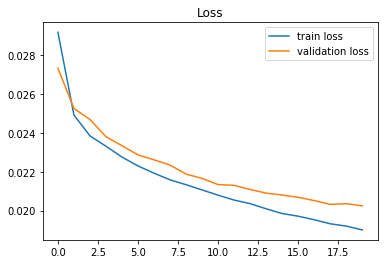

DNN learning curve 2/20


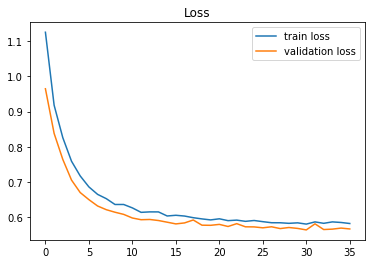

AUC 0.7738470330213449




 10%|████████▏                                                                         | 2/20 [04:00<36:12, 120.69s/it]

DAE learning curve 3/20


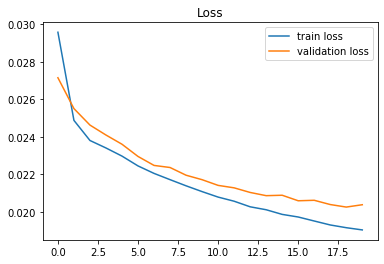

DNN learning curve 3/20


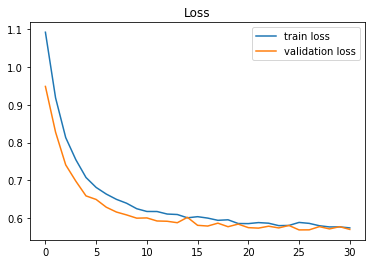

AUC 0.7533372630633448




 15%|████████████▎                                                                     | 3/20 [06:02<34:18, 121.10s/it]

DAE learning curve 4/20


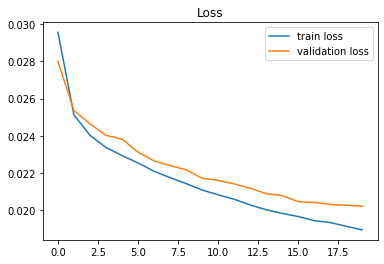

DNN learning curve 4/20


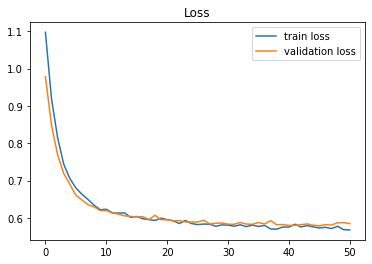

AUC 0.7551021967818234




 20%|████████████████▍                                                                 | 4/20 [08:13<33:03, 123.99s/it]

DAE learning curve 5/20


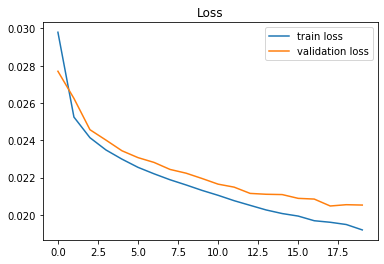

DNN learning curve 5/20


AUC 0.7641638886882747




 25%|████████████████████▌                                                             | 5/20 [10:23<31:28, 125.87s/it]

DAE learning curve 6/20


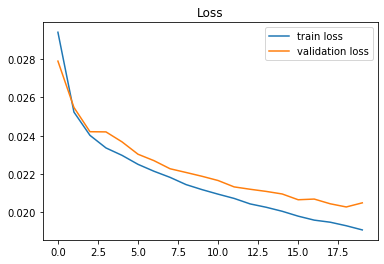

DNN learning curve 6/20


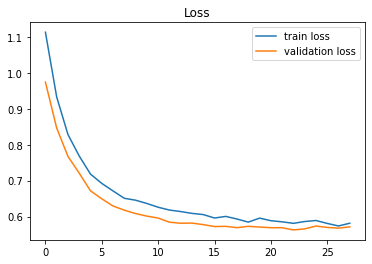

AUC 0.7622555643879173




 30%|████████████████████████▌                                                         | 6/20 [12:29<29:22, 125.90s/it]

DAE learning curve 7/20


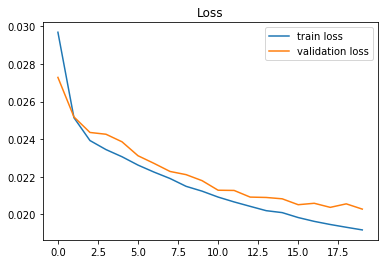

DNN learning curve 7/20


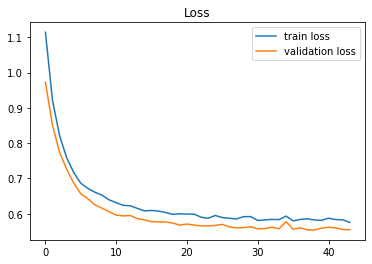

AUC 0.7923004092602773




 35%|████████████████████████████▋                                                     | 7/20 [14:43<27:48, 128.32s/it]

DAE learning curve 8/20


DNN learning curve 8/20


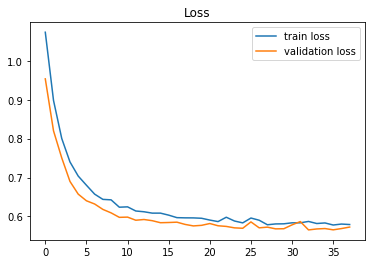

AUC 0.7600785545954437




 40%|████████████████████████████████▊                                                 | 8/20 [17:00<26:10, 130.87s/it]

DAE learning curve 9/20


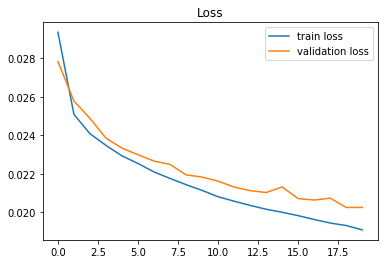

DNN learning curve 9/20


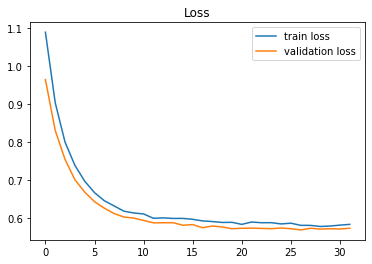

AUC 0.7671458468476817




 45%|████████████████████████████████████▉                                             | 9/20 [19:17<24:18, 132.61s/it]

DAE learning curve 10/20


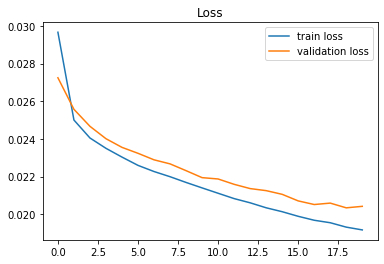

DNN learning curve 10/20


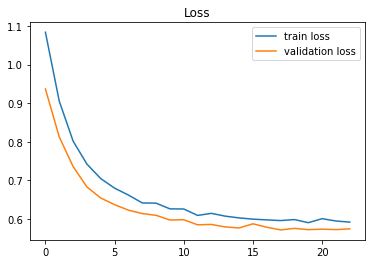

AUC 0.7604745406907002




 50%|████████████████████████████████████████▌                                        | 10/20 [21:34<22:21, 134.10s/it]

DAE learning curve 11/20


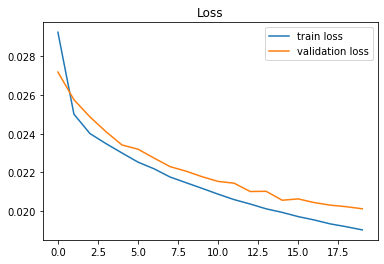

DNN learning curve 11/20


AUC 0.749368554189705




 55%|████████████████████████████████████████████▌                                    | 11/20 [24:07<20:56, 139.61s/it]

DAE learning curve 12/20


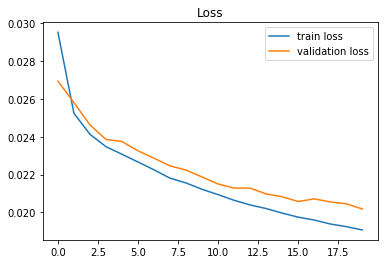

DNN learning curve 12/20


AUC 0.785033079954955




 60%|████████████████████████████████████████████████▌                                | 12/20 [26:31<18:47, 140.98s/it]

DAE learning curve 13/20


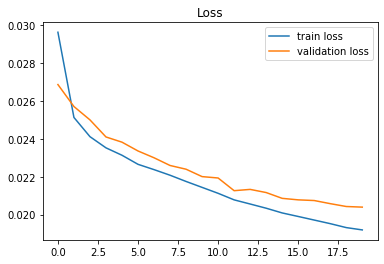

DNN learning curve 13/20


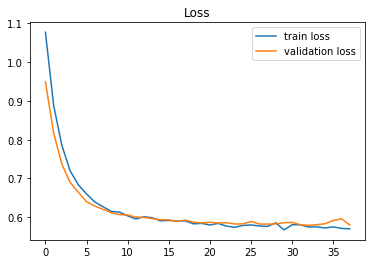

AUC 0.7546209729332066




 65%|████████████████████████████████████████████████████▋                            | 13/20 [29:02<16:47, 143.99s/it]

DAE learning curve 14/20


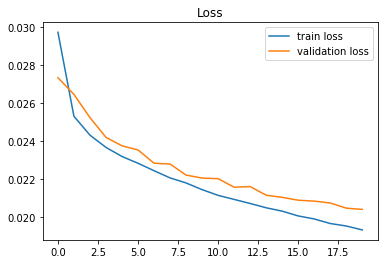

DNN learning curve 14/20


AUC 0.74562955433873




 70%|████████████████████████████████████████████████████████▋                        | 14/20 [31:45<14:57, 149.58s/it]

DAE learning curve 15/20


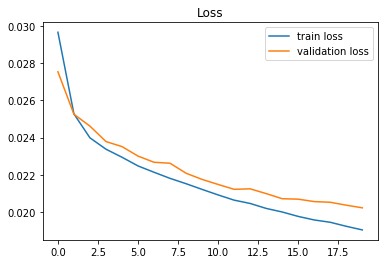

DNN learning curve 15/20


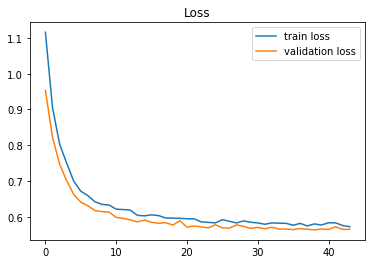

AUC 0.7642463974514396




 75%|████████████████████████████████████████████████████████████▊                    | 15/20 [34:27<12:46, 153.37s/it]

DAE learning curve 16/20


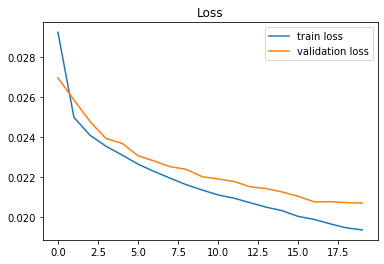

DNN learning curve 16/20


AUC 0.7812043512043512




 80%|████████████████████████████████████████████████████████████████▊                | 16/20 [37:06<10:20, 155.16s/it]

DAE learning curve 17/20


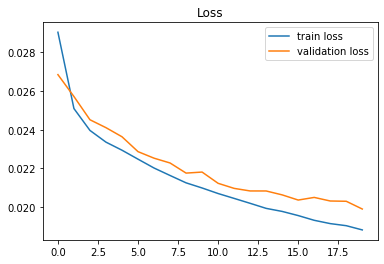

DNN learning curve 17/20


AUC 0.7558488047801081




 85%|████████████████████████████████████████████████████████████████████▊            | 17/20 [39:53<07:56, 158.71s/it]

DAE learning curve 18/20


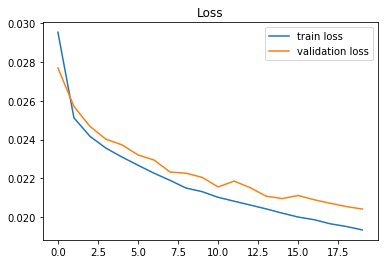

DNN learning curve 18/20


AUC 0.7522170608108109




 90%|████████████████████████████████████████████████████████████████████████▉        | 18/20 [43:01<05:34, 167.35s/it]

DAE learning curve 19/20


DNN learning curve 19/20


AUC 0.7547535771065182




 95%|████████████████████████████████████████████████████████████████████████████▉    | 19/20 [45:59<02:50, 170.54s/it]

DAE learning curve 20/20


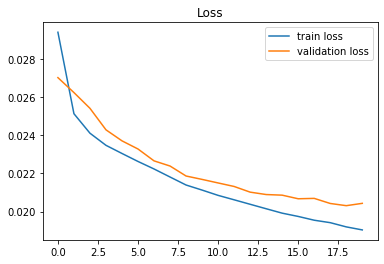

DNN learning curve 20/20


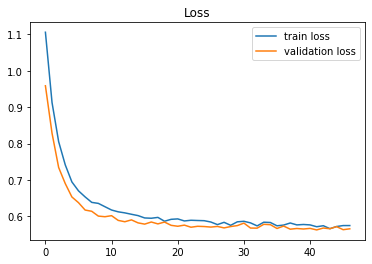

AUC 0.7667169431875315




100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [49:09<00:00, 147.47s/it]


Validation Summary:
6     0.792300
11    0.785033
15    0.781204
1     0.773847
8     0.767146
19    0.766717
0     0.764956
14    0.764246
4     0.764164
5     0.762256
9     0.760475
7     0.760079
16    0.755849
3     0.755102
18    0.754754
12    0.754621
2     0.753337
17    0.752217
10    0.749369
13    0.745630
dtype: float64
mean=0.76317, std=0.012


In [35]:
# Set hyper-parameters for power mean ensemble 
N = 20
p = 3.5
preds = []
aucs = []

for i in tqdm(range(N)):    
    X_train, X_test = train, test

    ##### STEP 1: Randomize Seed
    SEED = np.random.randint(1, 10000)              
    random.seed(SEED)       
    np.random.seed(SEED)     
    if tf.__version__[0] < '2':  
        tf.set_random_seed(SEED)
    else:
        tf.random.set_seed(SEED)

    ##### STEP 2: Build DAE #####
    
    # Define the encoder dimension
    encoding_dim = 128

    # Input Layer
    input_dim = Input(shape = (X_train.shape[1], ))

    # Encoder Layers
    noise = Dropout(0.5)(input_dim) # for Denoising
    encoded1 = Dense(512, activation = 'relu')(noise)
    encoded2 = Dense(256, activation = 'relu')(encoded1)
    encoded3 = Dense(128, activation = 'relu')(encoded2)
    encoded4 = Dense(encoding_dim, activation = 'relu')(encoded3)

    # Decoder Layers
    decoded1 = Dense(128, activation = 'relu')(encoded4)
    decoded2 = Dense(256, activation = 'relu')(decoded1)
    decoded3 = Dense(512, activation = 'relu')(decoded2)
    decoded4 = Dense(X_train.shape[1], activation = 'linear')(decoded3)

    # Combine Encoder and Deocder layers
    autoencoder = Model(inputs = input_dim, outputs = decoded4)

    # Compile the model
    autoencoder.compile(optimizer = 'adam', loss = 'mse')

    # Train the model
    history = autoencoder.fit(X_train, X_train, epochs=20, batch_size=64, 
                              shuffle=True, validation_data=(X_test,X_test), verbose=0)

    print(f'DAE learning curve {i+1}/{N}')
    plt.plot(history.history["loss"], label="train loss")
    plt.plot(history.history["val_loss"], label="validation loss")
    plt.legend()
    plt.title("Loss")
    plt.show()

    ##### STEP 3: Reduce Dimension #####
        
    # Use a middle Bottleneck Layer to Reduce Dimension
    model = Model(inputs=input_dim, outputs=encoded4)
    X_train = model.predict(X_train)
    X_test = model.predict(X_test)

    ##### STEP 4: Build a DNN Model

    # Define the Model architecture
    model = Sequential()
    model.add(Dense(32, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer=l2(0.01)))
    model.add(Dropout(0.3))
    model.add(Dense(16, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(1, activation='sigmoid'))

    # Train the Model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
    train_x, valid_x, train_y, valid_y = train_test_split(X_train, y_train, test_size=0.3)
    history = model.fit(train_x, train_y, epochs=100, batch_size=64, 
                        validation_data=(valid_x,valid_y), callbacks=[EarlyStopping(patience=5)], verbose=0)

    print(f'DNN learning curve {i+1}/{N}')
    plt.plot(history.history["loss"], label="train loss")
    plt.plot(history.history["val_loss"], label="validation loss")
    plt.legend()
    plt.title("Loss")
    plt.show()
    
    # Make Prediction
    auc = roc_auc_score(valid_y, model.predict(valid_x).flatten())
    aucs.append(auc)
    print('AUC', auc)
    preds.append(model.predict(X_test).flatten())   

### Validate the Models
print('\nValidation Summary:')
aucs = pd.Series(aucs)
print(aucs.sort_values(ascending=False))
print('mean={:.5f}, std={:.3f}'.format(aucs.mean(), aucs.std()))     

In [36]:
IDtest=np.arange(3500,5982)

In [41]:
# Power mean ensemble
THRESHOLD = 0.77  # Use only models whose AUC exceeds this value

pred = 0
n = 0
for i in range(N):
    if aucs.iloc[i] > THRESHOLD:
        pred = pred + preds[i]**p 
        n += 1
pred = pred / n    
pred = pred**(1/p)

# Make a submission file
fname = "서진영1-1.csv"
submissions = pd.concat([pd.Series(IDtest, name="cust_id"), pd.Series(pred, name="gender")] ,axis=1)
submissions.to_csv(fname, index=False)
print(f"'{fname}' is ready to submit.")

'서진영1-1.csv' is ready to submit.
